In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
df = pd.read_csv("amazon_reviews.csv")

In [3]:
# Storing some reviews for comparison
sample_reviews = df['Review'].sample(10)

In [4]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        100 non-null    object
 1   Review Title  100 non-null    object
 2   Review        100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [6]:
df.describe()

,Rating,Review Title,Review
count,100,100,100
unique,2,94,100
top,5 review-rating,Great,"Looking for the perfect blend of comfort, styl..."
freq,61,2,1


In [7]:
df.isnull().sum()

Rating          0
Review Title    0
Review          0
dtype: int64

## Using TextBlob

It works well for longer and complex sentences and uses a general approach considering
grammatical structure.

In [8]:
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

In [9]:
df['TextBlob Score'] = df['Review'].apply(get_sentiment)

In [10]:
df['TextBlob Sentiment'] = df['TextBlob Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

In [11]:
df

,Rating,Review Title,Review,TextBlob Score,TextBlob Sentiment
0,5 review-rating,Gildan Men's Crew T-Shirt Multipack: Your Go-T...,"Looking for the perfect blend of comfort, styl...",0.210922,Positive
1,5 review-rating,"The Perfect Everyday T-Shirt – Comfort, Qualit...","I’m always on the lookout for basic, comfortab...",0.236058,Positive
2,5 review-rating,Fast shipping and exactly what I ordered.,These are plain white shirts that fit perfect....,0.191617,Positive
3,4 review-rating,"Good quality,extremely comfortable lightweight...",These are considered undershirts because they ...,0.161111,Positive
4,5 review-rating,Fits Great !!,This is a perfect T-shirt! It’s not too thin n...,0.037679,Positive
...,...,...,...,...,...
95,4 review-rating,"Very cheap and decent, but not without flaws.","They feel good. Not top-of-the-line soft, but ...",0.295238,Positive
96,5 review-rating,perfect,"Perfect fit, perfect colors, durable, simple, ...",0.350000,Positive
97,4 review-rating,Light duty,Ok. Very basic. Not heavy-duty.,0.000000,Neutral
98,4 review-rating,Great value,Good undershirts. Great quality for the price,0.750000,Positive


## Using Vader

Vader is specifically designed for shorter texts, making it suitable for short reviews.
It can handle emoticons, slangs and punctuations better.

In [12]:
sid = SentimentIntensityAnalyzer()

In [13]:
def get_vader_sentiment(review):
    sentiment_scores = sid.polarity_scores(review)
    return sentiment_scores['compound']

In [14]:
df['VADER Score'] = df['Review'].apply(get_vader_sentiment)

In [15]:
df['VADER Sentiment'] = df['VADER Score'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

In [16]:
df

,Rating,Review Title,Review,TextBlob Score,TextBlob Sentiment,VADER Score,VADER Sentiment
0,5 review-rating,Gildan Men's Crew T-Shirt Multipack: Your Go-T...,"Looking for the perfect blend of comfort, styl...",0.210922,Positive,0.9947,Positive
1,5 review-rating,"The Perfect Everyday T-Shirt – Comfort, Qualit...","I’m always on the lookout for basic, comfortab...",0.236058,Positive,0.9947,Positive
2,5 review-rating,Fast shipping and exactly what I ordered.,These are plain white shirts that fit perfect....,0.191617,Positive,0.9752,Positive
3,4 review-rating,"Good quality,extremely comfortable lightweight...",These are considered undershirts because they ...,0.161111,Positive,0.9563,Positive
4,5 review-rating,Fits Great !!,This is a perfect T-shirt! It’s not too thin n...,0.037679,Positive,0.8491,Positive
...,...,...,...,...,...,...,...
95,4 review-rating,"Very cheap and decent, but not without flaws.","They feel good. Not top-of-the-line soft, but ...",0.295238,Positive,0.3606,Positive
96,5 review-rating,perfect,"Perfect fit, perfect colors, durable, simple, ...",0.350000,Positive,0.9432,Positive
97,4 review-rating,Light duty,Ok. Very basic. Not heavy-duty.,0.000000,Neutral,0.2960,Positive
98,4 review-rating,Great value,Good undershirts. Great quality for the price,0.750000,Positive,0.7906,Positive


In [17]:
df.to_csv('amazon_reviews_with_sentiments.csv', index=False)

## Comparison

In [18]:
for review in sample_reviews:
    tb_sentiment = TextBlob(review).sentiment.polarity
    tb_label = 'Positive' if tb_sentiment > 0 else ('Negative' if tb_sentiment < 0 else 'Neutral')

    vader_sentiment = sid.polarity_scores(review)['compound']
    vader_label = 'Positive' if vader_sentiment >= 0.05 else ('Negative' if vader_sentiment <= -0.05 else 'Neutral')

    print(f"Review: {review}")
    print(f"TextBlob: {tb_label} (Score: {tb_sentiment}), VADER: {vader_label} (Score: {vader_sentiment})\n")


Review: I needed some crew t-shirts to go underneath some of my clothes. I am thankful that I found these crew t-shirts. The material is very well made; and they fit just right. I love the feel of them. Thank you!
TextBlob: Positive (Score: 0.3776785714285714), VADER: Positive (Score: 0.9391)

Review: I really like how the shirt isn't short like it's kind of long but not wide if that makes sense and it feels nice and there was a little room left so I wasn't feeling stuffed. I'm currently trying to lose weight but as of right now [I weigh 300 lb and I'm 5'9" tall] and the shirts fit great! Also it was a great deal for 10 shirts!
TextBlob: Positive (Score: 0.29986263736263735), VADER: Positive (Score: 0.959)

Review: Got these for my son ' he's big & tall! Got. An xl , it fitted loose & a little long' which is what he likes" the quality is perfect! Very breathable! I will buy again!!
TextBlob: Positive (Score: 0.17936698717948718), VADER: Positive (Score: 0.7482)

Review: How many times 

In [19]:
textblob_counts = df['TextBlob Sentiment'].value_counts()
vader_counts = df['VADER Sentiment'].value_counts()

In [21]:
textblob_counts

TextBlob Sentiment
Positive    89
Neutral      8
Negative     3
Name: count, dtype: int64

In [22]:
vader_counts 

VADER Sentiment
Positive    91
Negative     5
Neutral      4
Name: count, dtype: int64

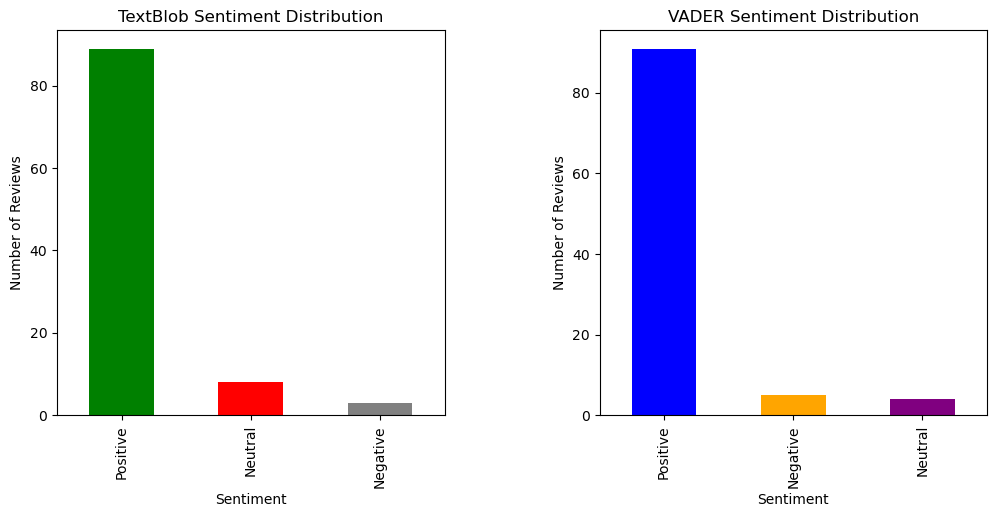

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

textblob_counts.plot(kind='bar', ax=axes[0], color=['green', 'red', 'gray'])
axes[0].set_title('TextBlob Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Reviews')

vader_counts.plot(kind='bar', ax=axes[1], color=['blue', 'orange', 'purple'])
axes[1].set_title('VADER Sentiment Distribution')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Reviews')

plt.subplots_adjust(wspace=0.4) 
plt.show()

Although, the positive sentiments are almost the same, the results mildly vary in neutral and negative sentiments.
Though in practise, the best approach may vary depending on your specific dataset and objectives.